# Monte Carlo Tree Search (MCTS)

In [1]:
import math
import random
import matplotlib.pyplot as plt

from agents.mcts import MCTS
from environments.tictactoe import TicTacToeEnv

from typing import Union

In [2]:
# matplotlib styles
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 4)

## Functions

In [3]:
# function for a single game
def play_game(env: TicTacToeEnv, player1: Union[None, MCTS], player2: Union[None, MCTS]) -> dict:
    """Plays a single game of TicTacToe between two players

    Args:
        env (TicTacToeEnv): _description_
        player1 (Union[None, MCTS]): Player 1 (or None for random player)
        player2 (Union[None, MCTS]): Player 2 (or None for random player)

    Returns:
        results (dict): Dictionary with the results of the game
    """
    
    # reset the environment
    state = env.reset()
    done = False
    
    # dictionary to store the results
    results = {
        'turns': 0,
        'won': 0
    }
    
    # play the game
    while True:
        if player1 == None:
            action = random.choice(env.possible_actions())
        else:
            action = player1.get_action(state)
        
        if action not in env.possible_actions():
            raise RuntimeError(f'Invalid action: {action}')
        
        state, done, reward, _ = env.step(action)
        results['turns'] += 1
        
        if done:
            break
        
        if player2 == None:
            action = random.choice(env.possible_actions())
        else:
            action = player2.get_action(state)
        
        if action not in env.possible_actions():
            raise RuntimeError(f'Invalid action: {action}')
        
        state, done, reward, _ = env.step(action)
        results['turns'] += 1
        
        if done:
            break
    
    # check who won
    state, done, reward, _ = env.step(1)
    results['won'] = env.who_has_won()
    
    # return the results
    return results

In [4]:
# function for running multiple games
def run(n_runs: int = 100, **kwargs) -> dict:
    """Runs multiple games of TicTacToe
    
    Args:
        n_runs (int, optional): Number of games to run. Defaults to 100.
        
    Returns:
        results (dict): Dictionary with the results of the games
    """
    
    # dictionary to store the results
    results = {}
    
    # run the games
    for i in range(n_runs):
        res = play_game(**kwargs)
        results.update({i: res})
    
    # return the results
    return results

## Experiments

### Random Agent vs. MCTS (2nd turn)

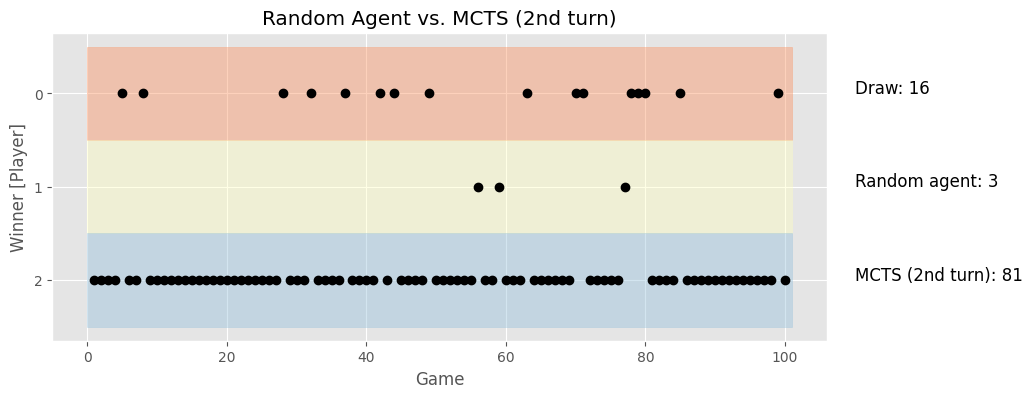

In [5]:
results = run(
    n_runs = 100,
    env = TicTacToeEnv(),
    player1 = None,
    player2 = MCTS(model = TicTacToeEnv(), c_uct = 1/math.sqrt(2.0), player = 2, constraint = 't1')
)

plot_runs = []
plot_won = []

for n_run, game_results in results.items():
    plot_runs.append(n_run+1)
    plot_won.append(game_results['won'])

plt.figure()
plt.gca().invert_yaxis()
plt.yticks([0, 1, 2])
plt.title('Random Agent vs. MCTS (2nd turn)')

plt.plot(plot_runs, plot_won, 'o', color = 'black', label = 'Reward')

plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], -0.5, 0.5, color = '#fc8d59', alpha = 0.4)
plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], 0.5, 1.5, color = '#ffffbf', alpha = 0.4)
plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], 1.5, 2.5, color = '#91bfdb', alpha = 0.4)

plt.text(110, 0, f'Draw: {plot_won.count(0)}', fontsize = 12)
plt.text(110, 1, f'Random agent: {plot_won.count(1)}', fontsize = 12)
plt.text(110, 2, f'MCTS (2nd turn): {plot_won.count(2)}', fontsize = 12)

plt.xlabel('Game')
plt.ylabel('Winner [Player]')

plt.show();

### MCTS (1st turn) vs. Random Agent

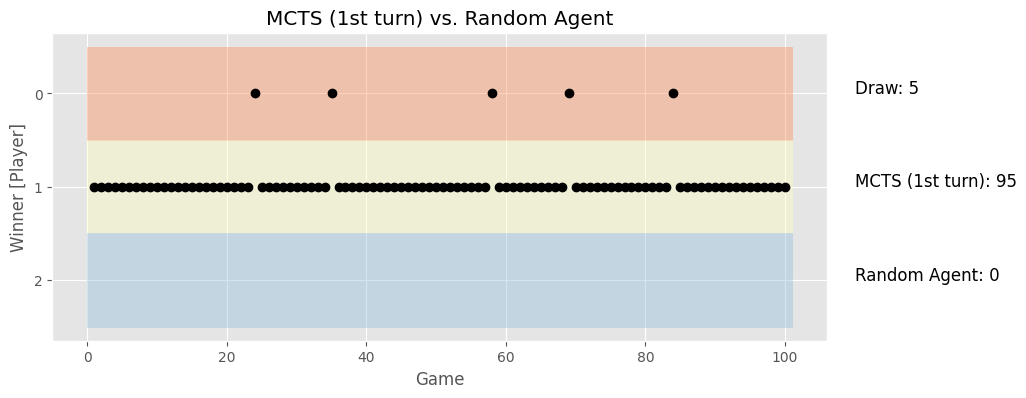

In [6]:
results = run(
    n_runs = 100,
    env = TicTacToeEnv(),
    player1 = MCTS(model = TicTacToeEnv(), c_uct = 1/math.sqrt(2.0), player = 1, constraint = 't1'),
    player2 = None
)

plot_runs = []
plot_won = []

for n_run, game_results in results.items():
    plot_runs.append(n_run+1)
    plot_won.append(game_results['won'])

plt.figure()
plt.gca().invert_yaxis()
plt.yticks([0, 1, 2])
plt.title('MCTS (1st turn) vs. Random Agent')

plt.plot(plot_runs, plot_won, 'o', color = 'black', label = 'Reward')

plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], -0.5, 0.5, color = '#fc8d59', alpha = 0.4)
plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], 0.5, 1.5, color = '#ffffbf', alpha = 0.4)
plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], 1.5, 2.5, color = '#91bfdb', alpha = 0.4)

plt.text(110, 0, f'Draw: {plot_won.count(0)}', fontsize = 12)
plt.text(110, 1, f'MCTS (1st turn): {plot_won.count(1)}', fontsize = 12)
plt.text(110, 2, f'Random Agent: {plot_won.count(2)}', fontsize = 12)

plt.xlabel('Game')
plt.ylabel('Winner [Player]')

plt.show();

### MCTS (1st turn) vs. MCTS (2nd turn)

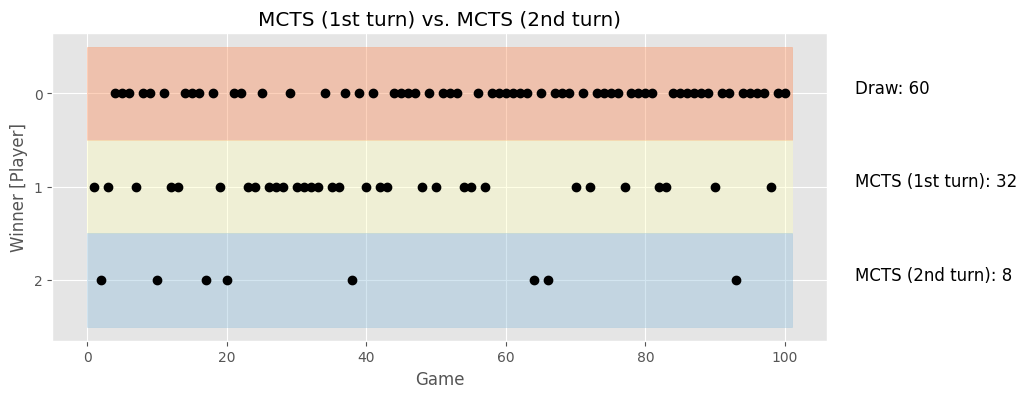

In [7]:
results = run(
    n_runs = 100,
    env = TicTacToeEnv(),
    player1 = MCTS(model = TicTacToeEnv(), c_uct = 1/math.sqrt(2.0), player = 1, constraint = 't1'),
    player2 = MCTS(model = TicTacToeEnv(), c_uct = 1/math.sqrt(2.0), player = 2, constraint = 't1')
)

plot_runs = []
plot_won = []

for n_run, game_results in results.items():
    plot_runs.append(n_run+1)
    plot_won.append(game_results['won'])

plt.figure()
plt.gca().invert_yaxis()
plt.yticks([0, 1, 2])

plt.title('MCTS (1st turn) vs. MCTS (2nd turn)')

plt.plot(plot_runs, plot_won, 'o', color = 'black', label = 'Reward')

plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], -0.5, 0.5, color = '#fc8d59', alpha = 0.4)
plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], 0.5, 1.5, color = '#ffffbf', alpha = 0.4)
plt.fill_between([0] + plot_runs + [plot_runs[-1]+1], 1.5, 2.5, color = '#91bfdb', alpha = 0.4)

plt.text(110, 0, f'Draw: {plot_won.count(0)}', fontsize = 12)
plt.text(110, 1, f'MCTS (1st turn): {plot_won.count(1)}', fontsize = 12)
plt.text(110, 2, f'MCTS (2nd turn): {plot_won.count(2)}', fontsize = 12)

plt.xlabel('Game')
plt.ylabel('Winner [Player]')

plt.show();